# Challenge Chapter 2
## Oleh: Revo Faris Saifuddin
Data Science

> Perkembangan industri telekomunikasi sangatlah 
cepat, hal ini dapat dilihat dari perilaku masyarakat 
yang menggunakan internet dalam berkomunikasi. 
Perilaku ini menyebabkan banyaknya perusahaan 
telekomunikasi dan meningkatnya internet service 
provider yang dapat menimbulkan persaingan 
antar provider. 
Pelanggan memiliki hak dalam memilih provider 
yang sesuai dan dapat beralih dari provider 
sebelumnya yang diartikan sebagai Customer 
Churn. 
Peralihan ini dapat menyebabkan berkurangnya 
pendapatan bagi perusahaan telekomunikasi 
sehingga penting untuk ditangani.




# Import Libraries

In [1]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

# preprocessing libraries
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For selecting optimum features
from sklearn.ensemble import ExtraTreesClassifier

# Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for evaluating the model performance
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# set style for the plots
sns.set_theme(style="darkgrid")

# Load Dataset

In [3]:
# membaca data set
dfTrain = pd.read_csv('/content/drive/MyDrive/Data_Science/DataScience_Binar/ChallengeChapter2/train.csv')

In [ ]:
# menampilakn 5 data teratas pada dataframe
dfTrain

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
# cek data frame Train
dfTrain.shape

(4250, 20)

In [ ]:
# informasi general isi data pada data frame
# .info()digunakan untuk mengecek apakah dataset yang kita miliki memiliki atau terdapat nilai Nan atau Missing value
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Pengamatan:
  1. Data terdiri dari 4250 bari pada data train.csv
  2. Data terdiri dari 20 kolom

In [ ]:
dfTrain.columns.values

array(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [ ]:
# pengelompokan kolom berdasarkan jenis
nums = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls',
        'total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge',
        'total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes',
        'total_intl_calls','total_intl_charge','number_customer_service_calls']
cats = ['state','area_code','international_plan','voice_mail_plan','churn']

In [ ]:
#Menampilkan statistik deskriptif dari kolom yang bertipe numerik
dfTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


# Missing Data

In [ ]:
print(f'Berdasarkan data set yang dibaca tidak ada missing value dari data set tersebut')
dfTrain.isnull().sum()#Cek missing value data

Berdasarkan data set yang dibaca tidak ada missing value dari data set tersebut


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
# jumlah entry NULL di setiap kolom
dfTrain.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Dari visualisasi missing values kita dappat mengamati bahwa ia tidak terdapat pola menonjol, dapat diartikan tidak ada data yang tidak terbaca atau missing value


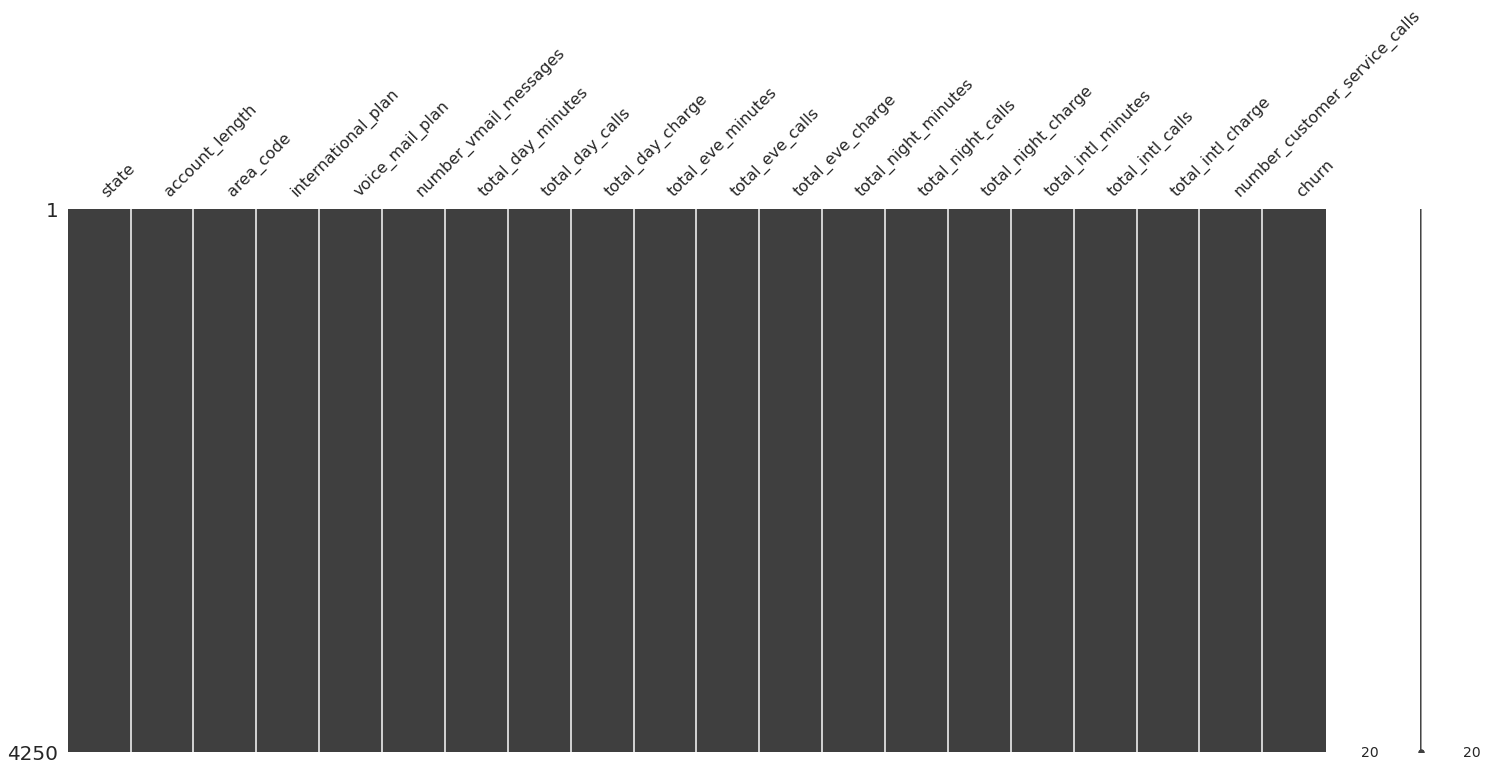

In [ ]:
# Visualisasi missing values
msno.matrix(dfTrain);
print("Dari visualisasi missing values kita dappat mengamati bahwa ia tidak terdapat pola menonjol, dapat diartikan tidak ada data yang tidak terbaca atau missing value")

# Duplicated Data

In [ ]:
# mengecek jumlah duplicated data baris pada dataframe
dfTrain.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Feature Encoding

In [ ]:
cats_updated = ['international_plan','voice_mail_plan','churn']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(dfTrain[col].value_counts())
  print('---'*10, '\n')

value counts of column international_plan
no     3854
yes     396
Name: international_plan, dtype: int64
------------------------------ 

value counts of column voice_mail_plan
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64
------------------------------ 

value counts of column churn
no     3652
yes     598
Name: churn, dtype: int64
------------------------------ 



Strategi encoding

*   international_plan, voice_mail_plan & churn : label encoding
*   state & area_code : One Hot Encoding

In [ ]:
mapping_international_plan = {
    'no' : 0,
    'yes' : 1
}

mapping_voice_mail_plan = {
    'no' : 0,
    'yes' : 1
}

mapping_churn = {
    'no' : 0,
    'yes' : 1
}

dfTrain['international_plan'] = dfTrain['international_plan'].map(mapping_international_plan)
dfTrain['voice_mail_plan'] = dfTrain['voice_mail_plan'].map(mapping_voice_mail_plan)
dfTrain['churn'] = dfTrain['churn'].map(mapping_churn)

In [ ]:
''' for cat in ['state', 'area_code']:
    onehots = pd.get_dummies(dfTrain[cat], prefix=cat)
    dfTrain = dfTrain.join(onehots) '''

In [ ]:
dfTrain.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Drop kolom-kolom yang outdated

In [ ]:
# drop kolom 'state', 'area_code' yang asli (karena sudah di-encoding)
''' dfTrain = dfTrain.drop(columns=['state', 'area_code']) '''

In [ ]:
''' dfTrain.head '''

## Visual Analysis

### Univariate Analysis
 analisa univariate merupakan analisa data feature tunggal akan membentuk sebuah kategori.

Analisis Dengan Menggunakan Nuivariate Analisys menampilakn Penggunaan layanan


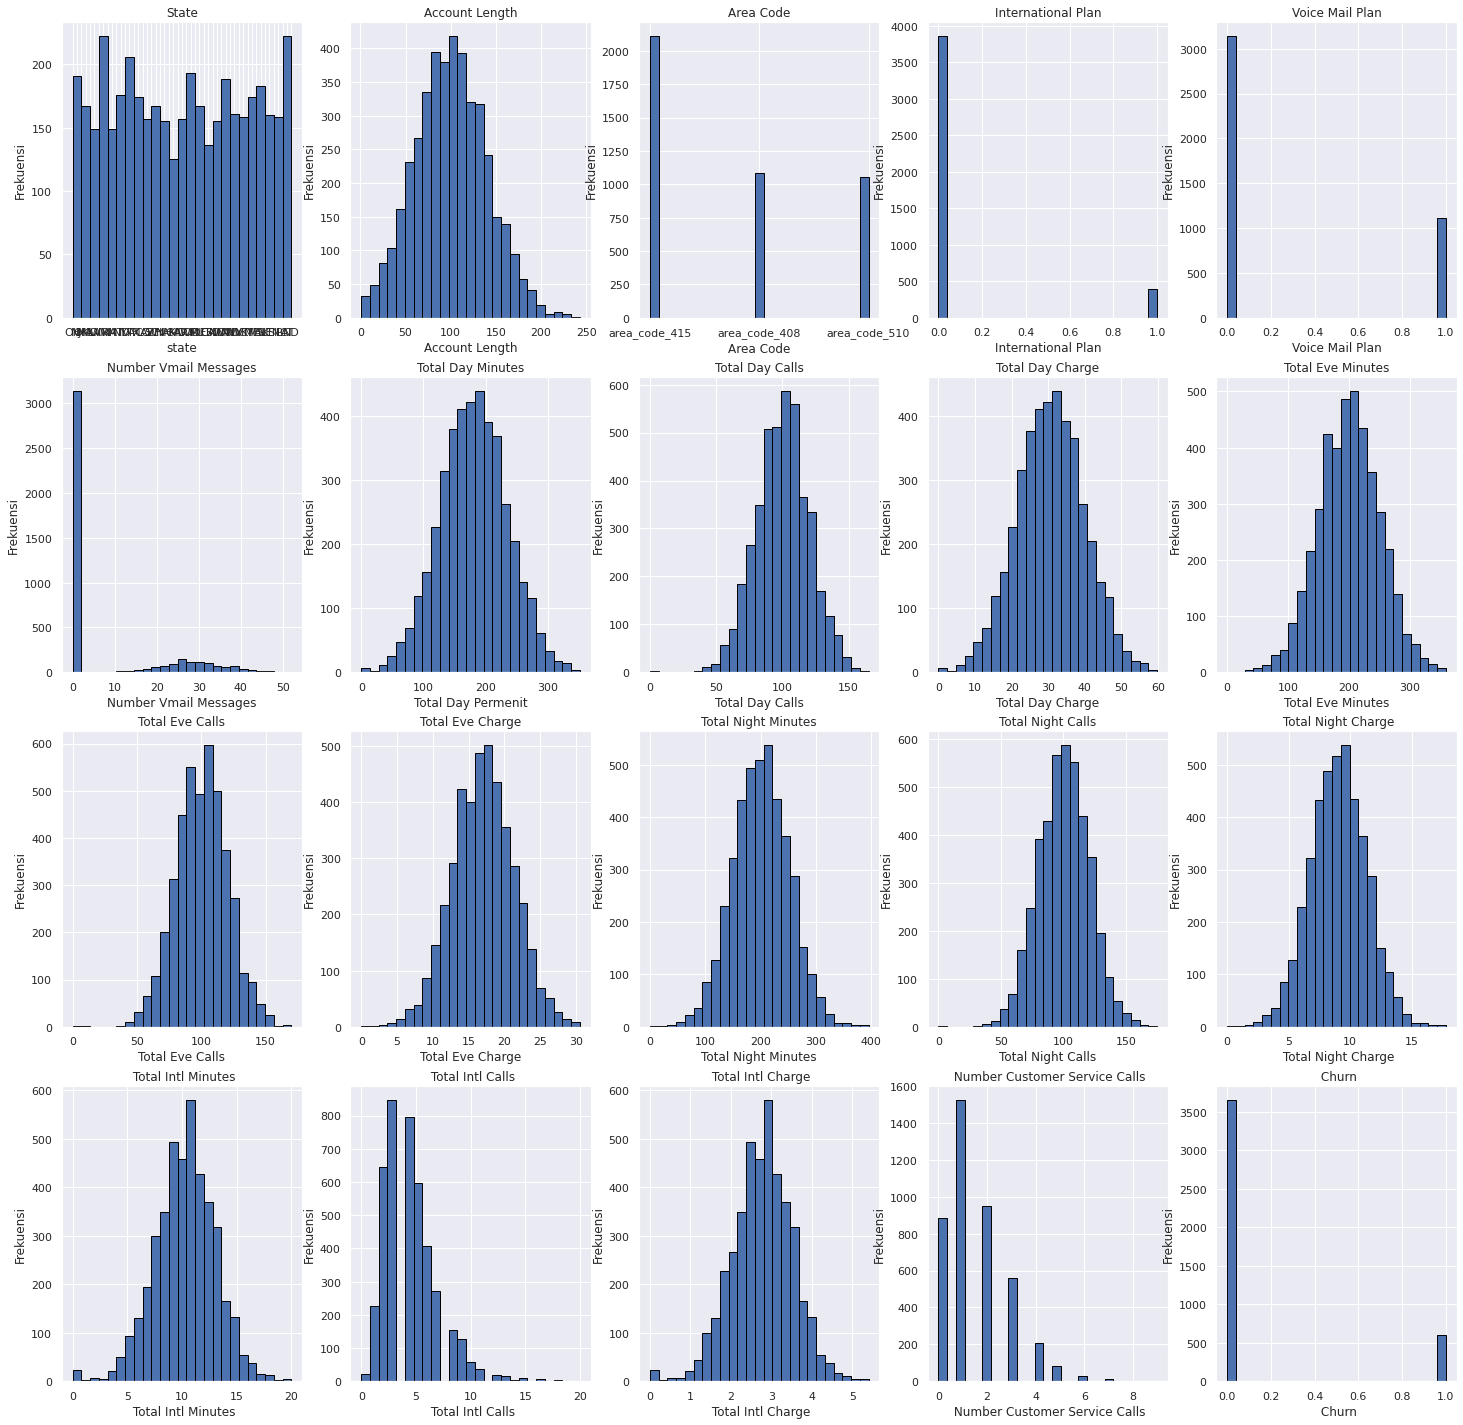

Dari hasil visualisasi dengan barchart atau histogram kita mendapatkan informasi mengenai informasi mengenai jumlah frekuensi dari setiap kolom data pada dataset dengan bentuk visual


In [ ]:
dfTrain
print('Analisis Dengan Menggunakan Nuivariate Analisys menampilakn Penggunaan layanan')
fig, axs = plt.subplots(figsize=(25,25),nrows=4, ncols=5)
axs[0][0].hist(dfTrain['state'],bins=25,edgecolor='black')
axs[0][0].set_xlabel('state')
axs[0][0].set_ylabel('Frekuensi')
axs[0][0].set_title('State')

axs[0][1].hist(dfTrain['account_length'],bins=25,edgecolor='black')
axs[0][1].set_xlabel('Account Length')
axs[0][1].set_ylabel('Frekuensi')
axs[0][1].set_title('Account Length')

axs[0][2].hist(dfTrain['area_code'],bins=25,edgecolor='black')
axs[0][2].set_xlabel('Area Code')
axs[0][2].set_ylabel('Frekuensi')
axs[0][2].set_title('Area Code')

axs[0][3].hist(dfTrain['international_plan'],bins=25,edgecolor='black')
axs[0][3].set_xlabel('International Plan')
axs[0][3].set_ylabel('Frekuensi')
axs[0][3].set_title('International Plan')

axs[0][4].hist(dfTrain['voice_mail_plan'],bins=25,edgecolor='black')
axs[0][4].set_xlabel('Voice Mail Plan')
axs[0][4].set_ylabel('Frekuensi')
axs[0][4].set_title('Voice Mail Plan')

axs[1][0].hist(dfTrain['number_vmail_messages'],bins=25,edgecolor='black')
axs[1][0].set_xlabel('Number Vmail Messages')
axs[1][0].set_ylabel('Frekuensi')
axs[1][0].set_title('Number Vmail Messages')

axs[1][1].hist(dfTrain['total_day_minutes'],bins=25,edgecolor='black')
axs[1][1].set_xlabel('Total Day Permenit')
axs[1][1].set_ylabel('Frekuensi')
axs[1][1].set_title('Total Day Minutes')

axs[1][2].hist(dfTrain['total_day_calls'],bins=25,edgecolor='black')
axs[1][2].set_xlabel('Total Day Calls')
axs[1][2].set_ylabel('Frekuensi')
axs[1][2].set_title('Total Day Calls')

axs[1][3].hist(dfTrain['total_day_charge'],bins=25,edgecolor='black')
axs[1][3].set_xlabel('Total Day Charge')
axs[1][3].set_ylabel('Frekuensi')
axs[1][3].set_title('Total Day Charge')

axs[1][4].hist(dfTrain['total_eve_minutes'],bins=25,edgecolor='black')
axs[1][4].set_xlabel('Total Eve Minutes')
axs[1][4].set_ylabel('Frekuensi')
axs[1][4].set_title('Total Eve Minutes')

axs[2][0].hist(dfTrain['total_eve_calls'],bins=25,edgecolor='black')
axs[2][0].set_xlabel('Total Eve Calls')
axs[2][0].set_ylabel('Frekuensi')
axs[2][0].set_title('Total Eve Calls')

axs[2][1].hist(dfTrain['total_eve_charge'],bins=25,edgecolor='black')
axs[2][1].set_xlabel('Total Eve Charge')
axs[2][1].set_ylabel('Frekuensi')
axs[2][1].set_title('Total Eve Charge')

axs[2][2].hist(dfTrain['total_night_minutes'],bins=25,edgecolor='black')
axs[2][2].set_xlabel('Total Night Minutes')
axs[2][2].set_ylabel('Frekuensi')
axs[2][2].set_title('Total Night Minutes')

axs[2][3].hist(dfTrain['total_night_calls'],bins=25,edgecolor='black')
axs[2][3].set_xlabel('Total Night Calls')
axs[2][3].set_ylabel('Frekuensi')
axs[2][3].set_title('Total Night Calls')

axs[2][4].hist(dfTrain['total_night_charge'],bins=25,edgecolor='black')
axs[2][4].set_xlabel(' Total Night Charge')
axs[2][4].set_ylabel('Frekuensi')
axs[2][4].set_title(' Total Night Charge')

axs[3][0].hist(dfTrain['total_intl_minutes'],bins=25,edgecolor='black')
axs[3][0].set_xlabel(' Total Intl Minutes')
axs[3][0].set_ylabel('Frekuensi')
axs[3][0].set_title(' Total Intl Minutes')

axs[3][1].hist(dfTrain['total_intl_calls'],bins=25,edgecolor='black')
axs[3][1].set_xlabel(' Total Intl Calls')
axs[3][1].set_ylabel('Frekuensi')
axs[3][1].set_title(' Total Intl Calls')

axs[3][2].hist(dfTrain['total_intl_charge'],bins=25,edgecolor='black')
axs[3][2].set_xlabel(' Total Intl Charge')
axs[3][2].set_ylabel('Frekuensi')
axs[3][2].set_title(' Total Intl Charge')

axs[3][3].hist(dfTrain['number_customer_service_calls'],bins=25,edgecolor='black')
axs[3][3].set_xlabel(' Number Customer Service Calls')
axs[3][3].set_ylabel('Frekuensi')
axs[3][3].set_title(' Number Customer Service Calls')

axs[3][4].hist(dfTrain['churn'],bins=25,edgecolor='black')
axs[3][4].set_xlabel(' Churn')
axs[3][4].set_ylabel('Frekuensi')
axs[3][4].set_title(' Churn')
plt.show()
print('Dari hasil visualisasi dengan barchart atau histogram kita mendapatkan informasi mengenai informasi mengenai jumlah frekuensi dari setiap kolom data pada dataset dengan bentuk visual')

### Bivariate Analysis

In [ ]:
print('Analisis dengan menggunakan Bivariate')
# melakukan cek data berdasarkan day calls tertinggi
total_day_chargeDT = dfTrain.sort_values(by=['total_day_charge'], ascending=False).head(10)
total_day_chargeDT

Analisis dengan menggunakan Bivariate


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3381,NJ,112,area_code_408,0,0,0,351.5,95,59.76,206.8,108,17.58,275.8,146,12.41,11.9,4,3.21,1,1
827,NY,64,area_code_415,1,0,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2202,OH,115,area_code_510,1,0,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
2921,UT,133,area_code_510,0,0,0,338.4,86,57.53,234.6,97,19.94,264.8,139,11.92,14.8,4,4.00,3,1
129,OH,83,area_code_415,0,0,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
500,MO,112,area_code_415,0,0,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
817,DE,129,area_code_510,0,0,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,1
12,NY,161,area_code_415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3494,UT,101,area_code_415,0,0,0,332.1,91,56.46,151.0,123,12.84,277.8,99,12.50,11.3,3,3.05,1,1
1415,OK,82,area_code_510,0,0,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,1


In [ ]:
# melakukan cek data berdasarkan eve charge tertinggi
total_eve_chargeDT = dfTrain.sort_values(by=['total_eve_charge'], ascending=False).head(10)
total_eve_chargeDT

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4157,IN,63,area_code_510,0,0,0,6.6,107,1.12,359.3,142,30.54,252.5,131,11.36,5.6,3,1.51,0,0
3873,TX,145,area_code_510,0,0,0,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,6.2,6,1.67,2,0
6,LA,117,area_code_408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
3524,NY,98,area_code_510,0,0,0,198.6,92,33.76,349.4,99,29.70,221.7,83,9.98,7.3,6,1.97,2,1
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
479,IN,113,area_code_415,0,0,0,209.4,151,35.60,347.3,113,29.52,246.0,116,11.07,7.4,2,2.00,1,1
3924,WY,117,area_code_408,0,0,0,150.5,121,25.59,345.1,132,29.33,183.9,97,8.28,8.3,2,2.24,0,0
3854,KS,39,area_code_408,0,0,0,181.2,71,30.80,344.9,108,29.32,213.6,145,9.61,12.1,2,3.27,3,0
3345,KY,132,area_code_415,0,0,0,172.7,90,29.36,344.0,62,29.24,301.6,113,13.57,5.5,4,1.49,0,0
2602,CO,181,area_code_510,0,1,40,105.2,61,17.88,341.3,79,29.01,165.7,97,7.46,6.3,3,1.70,2,0


In [ ]:
# melakukan cek data berdasarkan night charge tertinggi
total_night_chargeDT = dfTrain.sort_values(by=['total_night_charge'], ascending=False).head(10)
total_night_chargeDT

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2257,VA,172,area_code_510,0,0,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,0
1114,NE,89,area_code_415,0,1,29,163.5,80,27.80,274.8,136,23.36,381.9,147,17.19,7.5,5,2.03,2,0
2865,SD,98,area_code_415,0,0,0,307.2,65,52.22,138.6,97,11.78,381.6,99,17.17,10.2,4,2.75,2,1
1222,ID,55,area_code_510,0,1,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1,0
1973,AR,153,area_code_408,0,0,0,154.6,56,26.28,263.0,84,22.36,367.7,89,16.55,15.5,2,4.19,1,0
2631,GA,73,area_code_408,0,0,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,0
3296,NH,163,area_code_415,0,1,39,268.1,104,45.58,216.6,65,18.41,359.9,118,16.20,11.4,4,3.08,0,0
4015,AR,130,area_code_415,0,0,0,182.1,136,30.96,204.2,99,17.36,355.1,135,15.98,12.0,7,3.24,2,0
1041,OH,147,area_code_415,1,1,24,219.9,118,37.38,208.5,116,17.72,352.5,111,15.86,8.1,4,2.19,3,0
2590,LA,94,area_code_415,0,0,0,212.1,98,36.06,189.4,89,16.10,352.2,95,15.85,8.4,5,2.27,3,0


In [ ]:
# melakukan cek data berdasarkan intl charge tertinggi
total_intl_chargeDT = dfTrain.sort_values(by=['total_intl_charge'], ascending=False).head(10)
total_intl_chargeDT

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
96,ME,36,area_code_510,1,1,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,1
3725,KY,55,area_code_415,0,1,37,197.5,89,33.58,228.7,141,19.44,313.4,121,14.10,19.7,2,5.32,1,0
4230,KY,145,area_code_408,0,0,0,135.0,122,22.95,206.3,88,17.54,210.4,90,9.47,19.7,4,5.32,0,0
3301,KS,104,area_code_408,0,0,0,191.8,105,32.61,148.7,96,12.64,234.8,123,10.57,19.3,4,5.21,1,0
3311,CT,68,area_code_510,1,0,0,197.7,99,33.61,188.8,106,16.05,254.6,80,11.46,19.2,4,5.18,3,1
261,ID,128,area_code_408,0,0,0,125.2,99,21.28,205.4,107,17.46,254.4,111,11.45,18.9,2,5.10,0,0
4018,AZ,127,area_code_415,0,1,29,136.1,146,23.14,302.6,105,25.72,163.1,116,7.34,18.5,2,5.00,2,0
1530,OR,53,area_code_415,0,0,0,184.8,98,31.42,216.4,125,18.39,141.1,116,6.35,18.4,3,4.97,2,0
2384,ID,130,area_code_415,0,0,0,263.7,113,44.83,186.5,103,15.85,195.3,99,8.79,18.3,6,4.94,1,1
443,NE,194,area_code_408,0,0,0,48.4,101,8.23,281.1,138,23.89,218.5,87,9.83,18.2,1,4.91,1,0


visualisasi scatter plot ini digunakan untuk mengetahui rentang nilai dengan data set relatif kecil yang berkaitan day charge dengan churn


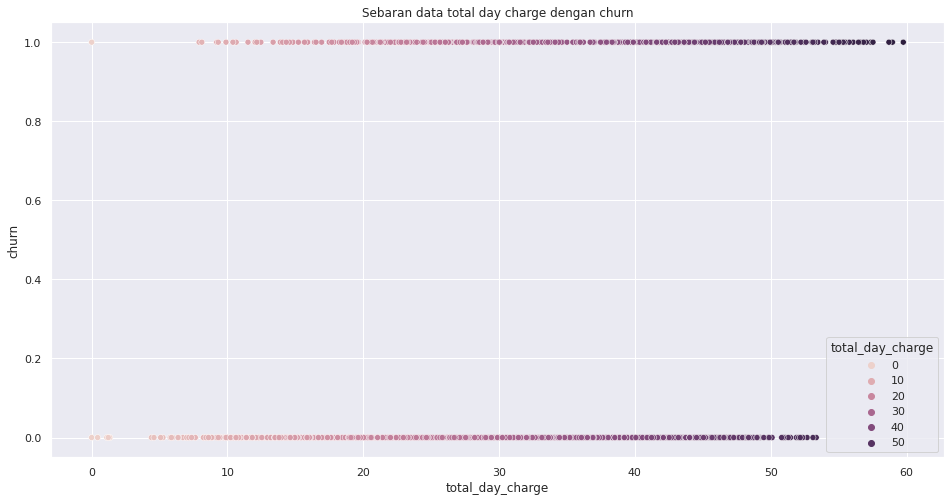

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
print("visualisasi scatter plot ini digunakan untuk mengetahui rentang nilai dengan data set relatif kecil yang berkaitan day charge dengan churn")
dfs = sns.scatterplot(x='total_day_charge', y='churn', hue='total_day_charge', data=dfTrain)
ax.set_title('Sebaran data total day charge dengan churn')
plt.show()

visualisasi scatter plot ini digunakan untuk mengetahui rentang nilai dengan data set relatif kecil yang berkaitan eve charge dengan churn


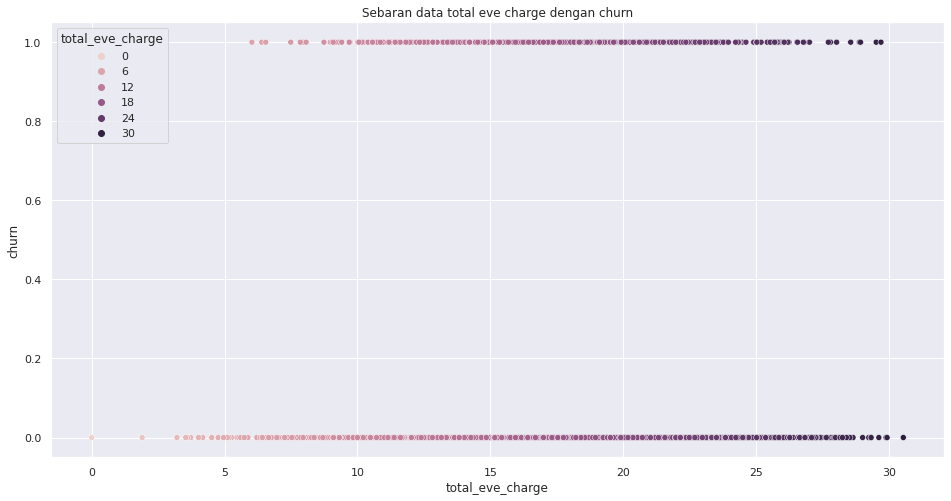

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
print("visualisasi scatter plot ini digunakan untuk mengetahui rentang nilai dengan data set relatif kecil yang berkaitan eve charge dengan churn")
dfs = sns.scatterplot(x='total_eve_charge', y='churn', hue='total_eve_charge', data=dfTrain)
ax.set_title('Sebaran data total eve charge dengan churn')
plt.show()

### Multivariate

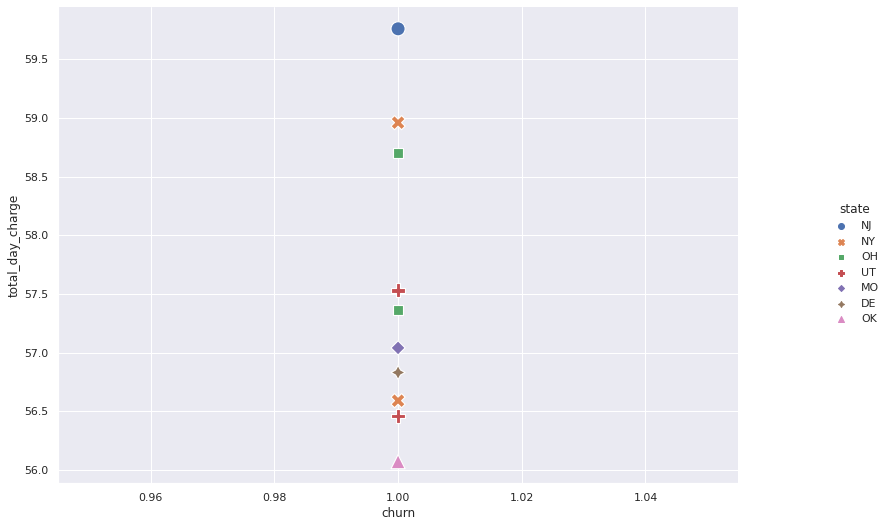

In [ ]:
ka = sns.relplot(data=total_day_chargeDT, x='churn', 
            y='total_day_charge', hue='state', style='state', 
            s=200)
ka.fig.set_size_inches(14,8)
plt.show()

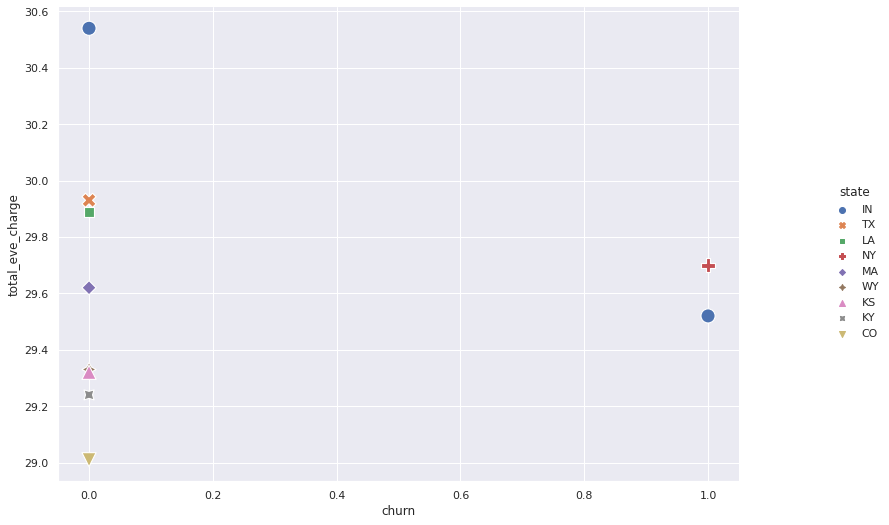

In [ ]:
ka = sns.relplot(data=total_eve_chargeDT, x='churn', 
            y='total_eve_charge', hue='state', style='state', 
            s=200)
ka.fig.set_size_inches(14,8)
plt.show()

### Data visualisasi churn kolom

In [ ]:
p_labels = ['No', 'Yes']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=p_labels, values=dfTrain['international_plan'].value_counts(), name="International Plan"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=dfTrain['churn'].value_counts(), name="churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="International Plan and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='International Plan', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

14.1% cutomer beralih ke perusahaan provider lainnya
pelanggan internasional 9.32% dan pelanggan dalam negeri 90.7%  

In [ ]:
dfTrain['international_plan'][dfTrain['international_plan']==0].groupby(dfTrain['churn']).count()

churn
0    3423
1     431
Name: international_plan, dtype: int64

In [ ]:
dfTrain['international_plan'][dfTrain['international_plan']==1].groupby(dfTrain['churn']).count()

churn
0    229
1    167
Name: international_plan, dtype: int64

In [ ]:
fig = px.histogram(dfTrain, x="churn", color="international_plan", barmode="group", title="<b>Customer international plan<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:

fig = px.histogram(dfTrain, x="churn", color="voice_mail_plan", barmode="group", title="<b>Customer voice mail plan<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Handling outliers

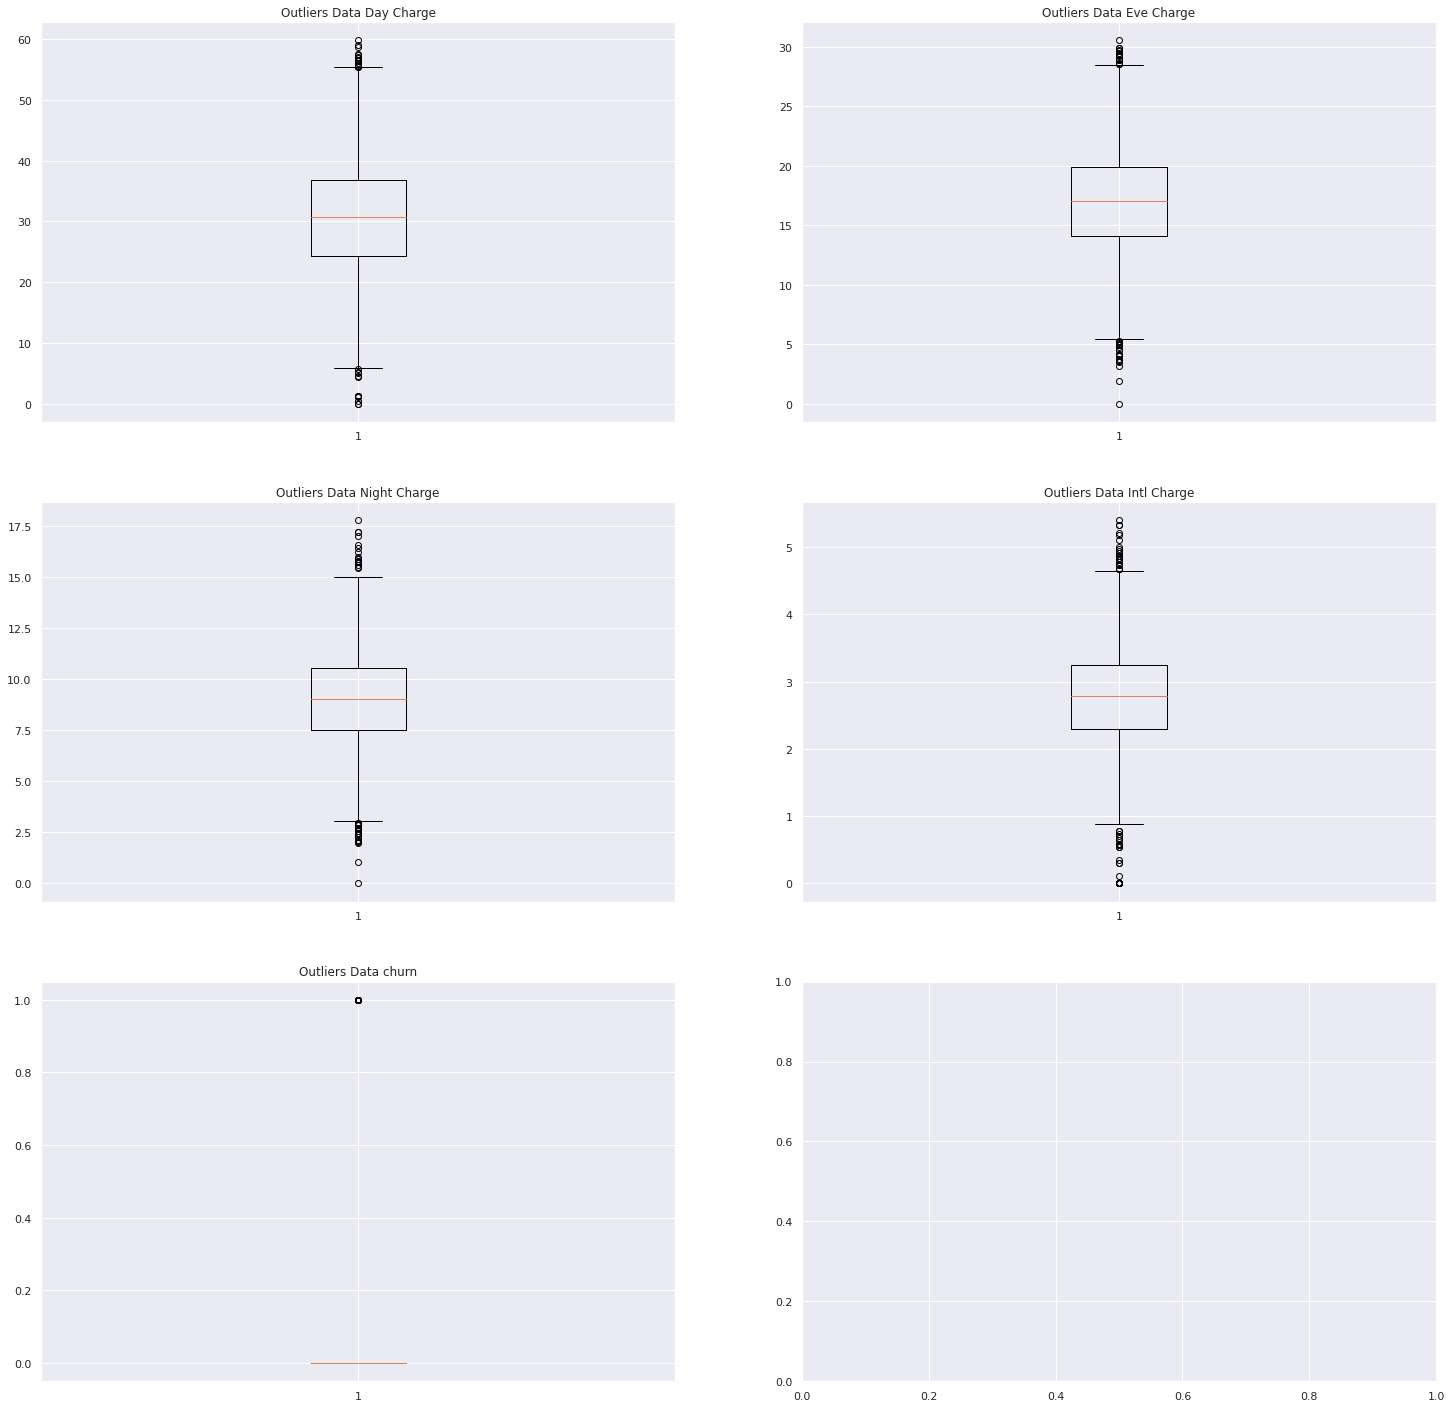

In [ ]:
fig, axs = plt.subplots(figsize=(25,25),nrows=3, ncols=2)
axs[0][0].boxplot(dfTrain['total_day_charge'])
axs[0][0].set_title('Outliers Data Day Charge')

axs[0][1].boxplot(dfTrain['total_eve_charge'])
axs[0][1].set_title('Outliers Data Eve Charge')

axs[1][0].boxplot(dfTrain['total_night_charge'])
axs[1][0].set_title('Outliers Data Night Charge')

axs[1][1].boxplot(dfTrain['total_intl_charge'])
axs[1][1].set_title('Outliers Data Intl Charge')

axs[2][0].boxplot(dfTrain['churn'])
axs[2][0].set_title('Outliers Data churn')
plt.show()

## remove Outliers Data

In [ ]:
#remove outliner
def remove_outliner_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    DF_F = dfTrain[~((dfTrain<(Q1-1.5*IQR))|(dfTrain>(Q3+1.5*IQR)))]
    return DF_F
df_out_r = remove_outliner_IQR(dfTrain[['state','total_day_charge','total_eve_charge', 'total_night_charge',
                                  'total_intl_charge']])
df_out_r.dropna(axis=0,inplace=True)
df_out_r1 = remove_outliner_IQR(df_out_r[['state','total_day_charge','total_eve_charge', 'total_night_charge',
                                  'total_intl_charge']])
df_out_r1.dropna(axis=0,inplace=True)
df_out_r1.fillna(method ='ffill')
df_out_r1.isnull().sum()
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(df_out_r1.describe())
display(df_out_r1)
dfNew = df_out_r1['state']
dfNew

Nilai Maximum dari masing-masing Variable adalah: 
       account_length  international_plan  voice_mail_plan  \
count     4075.000000         4075.000000      4075.000000   
mean       100.146012            0.092761         0.264294   
std         39.709519            0.290132         0.441011   
min          1.000000            0.000000         0.000000   
25%         73.000000            0.000000         0.000000   
50%        100.000000            0.000000         0.000000   
75%        127.000000            0.000000         1.000000   
max        243.000000            1.000000         1.000000   

       number_vmail_messages  total_day_minutes  total_day_calls  \
count            4075.000000        4075.000000      4075.000000   
mean                7.710184         180.144785        99.904294   
std                13.486304          52.587113        19.711435   
min                 0.000000          35.100000        30.000000   
25%                 0.000000         143.550000   

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,MO,147,area_code_415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,WV,141,area_code_415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


0       OH
1       NJ
3       OK
5       MO
7       WV
        ..
4245    MT
4246    WV
4247    NC
4248    HI
4249    VT
Name: state, Length: 4075, dtype: object

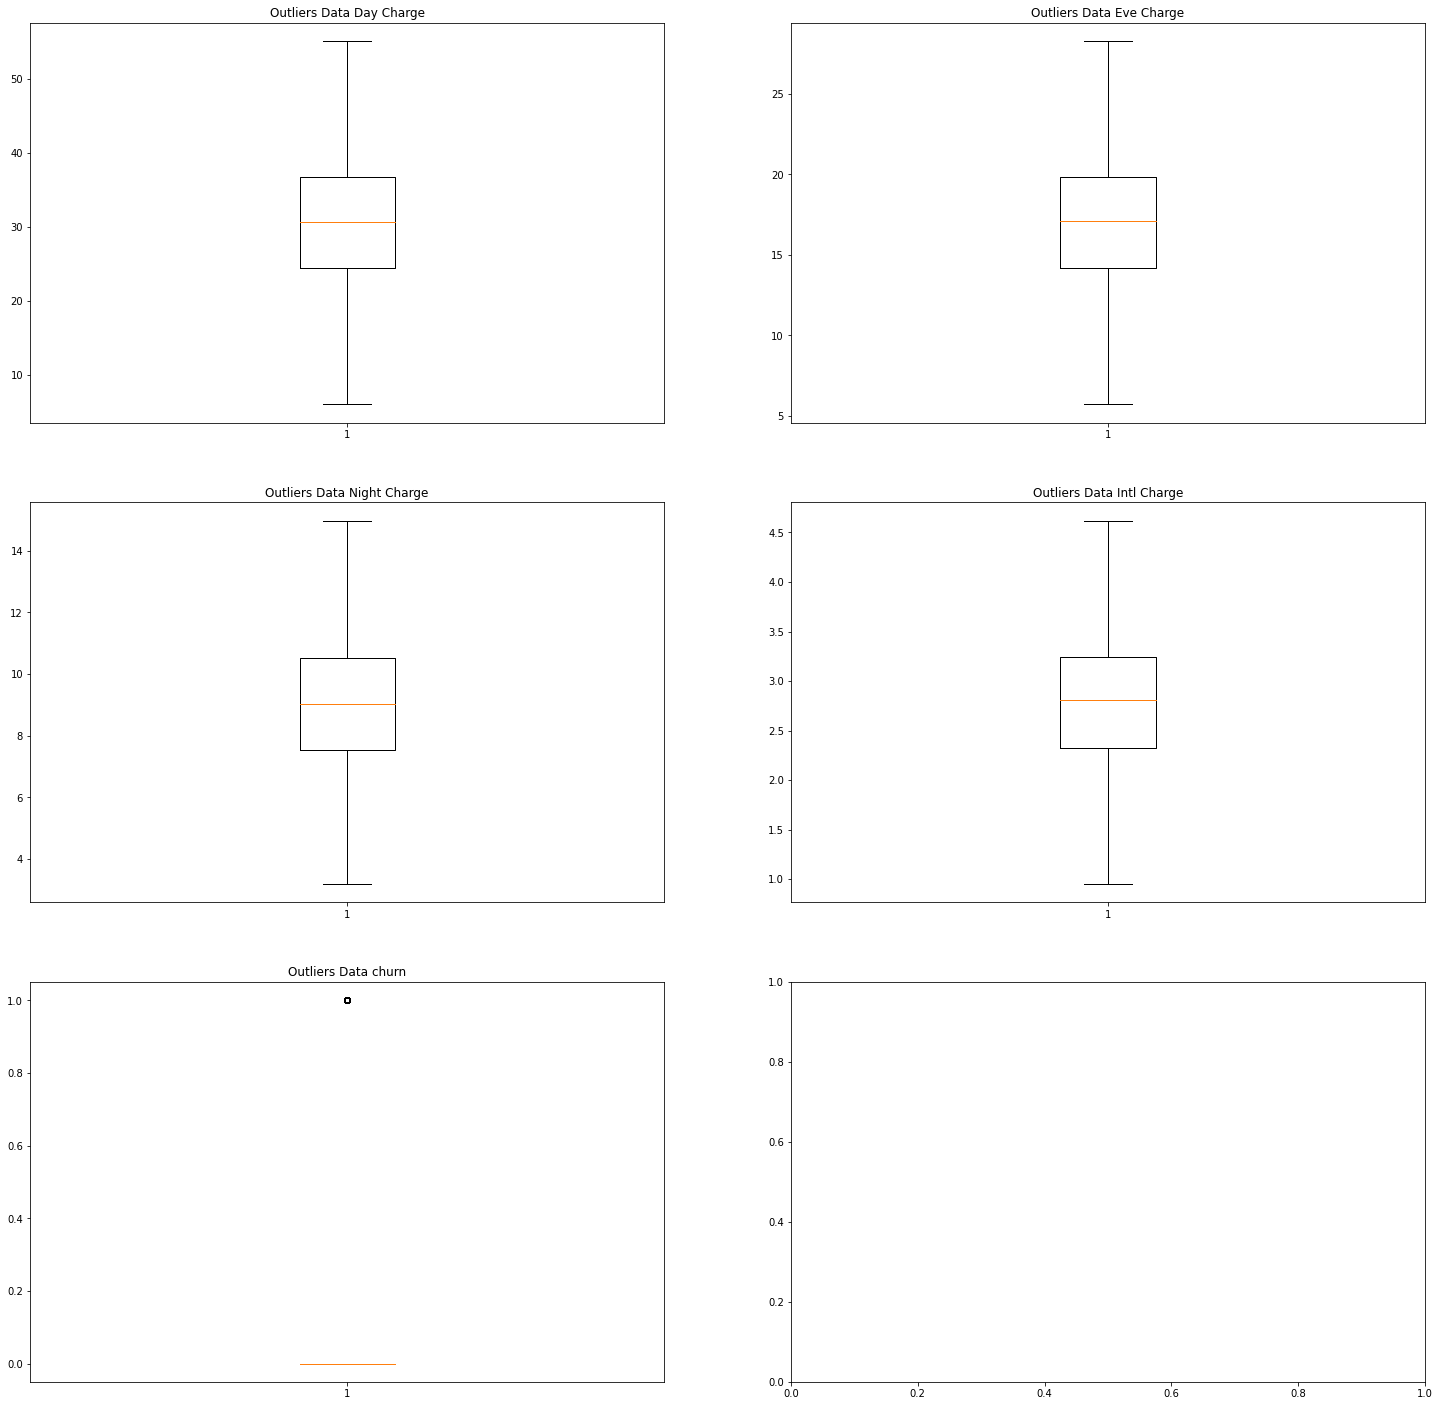

In [ ]:
fig, axs = plt.subplots(figsize=(25,25),nrows=3, ncols=2)
axs[0][0].boxplot(df_out_r1['total_day_charge'])
axs[0][0].set_title('Outliers Data Day Charge')

axs[0][1].boxplot(df_out_r1['total_eve_charge'])
axs[0][1].set_title('Outliers Data Eve Charge')

axs[1][0].boxplot(df_out_r1['total_night_charge'])
axs[1][0].set_title('Outliers Data Night Charge')

axs[1][1].boxplot(df_out_r1['total_intl_charge'])
axs[1][1].set_title('Outliers Data Intl Charge')

axs[2][0].boxplot(df_out_r1['churn'])
axs[2][0].set_title('Outliers Data churn')
plt.show()

## Drop kolom kolom yang tidak digunakan untuk ML

In [ ]:
# drop kolom pekerjaan dan sampo yang asli (karena sudah di-encoding)
df_new = df_out_r1.drop(columns=['state', 'account_length', 'area_code','number_vmail_messages',
                                 'total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes',
                                 'total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls','number_customer_service_calls'])

In [ ]:
df_new.head()

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,churn
0,0,1,27.47,16.62,11.45,3.70,0
1,0,0,41.38,10.30,7.32,3.29,0
3,1,0,28.34,12.61,8.41,2.73,0
5,1,0,26.69,8.76,9.53,1.92,0
7,1,1,43.96,18.87,14.69,3.02,0


## Korelasi Data

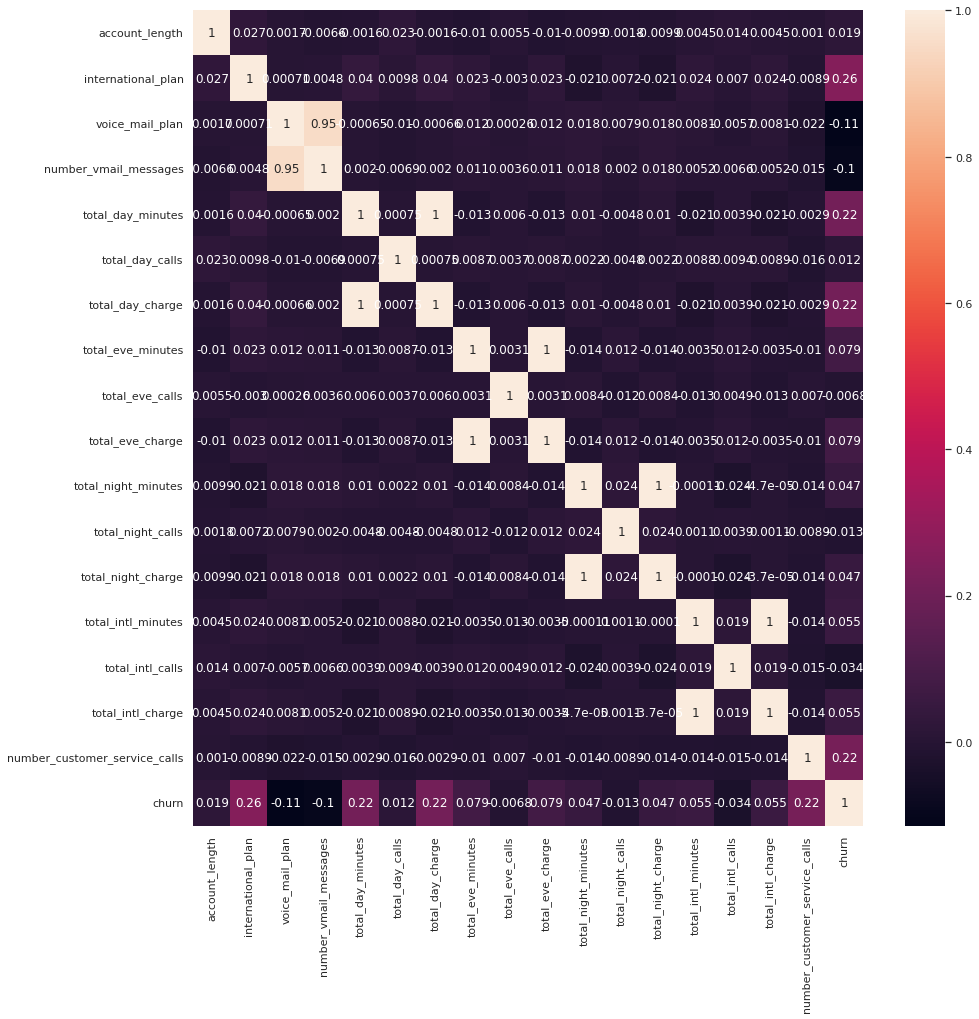

In [ ]:
#cek korelasi data sebelum remove outliner
plt.subplots(figsize=(15,15))
dtkorel = dfTrain.corr()
dtkorel = sns.heatmap(dtkorel, annot= True, fmt='.2g')
plt.show()

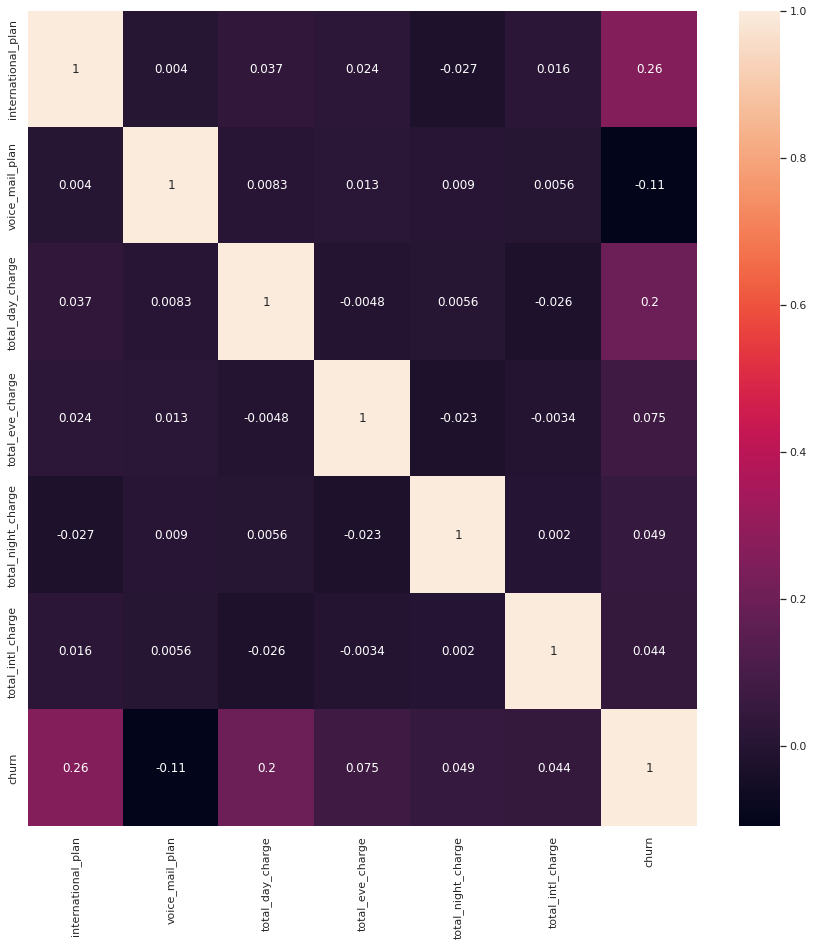

In [ ]:
#cek korelasi data setelah remove outliner
plt.subplots(figsize=(15,15))
dtkorel = df_new.corr()
dtkorel = sns.heatmap(dtkorel, annot= True, fmt='.2g')
plt.show()

<function matplotlib.pyplot.ioff()>

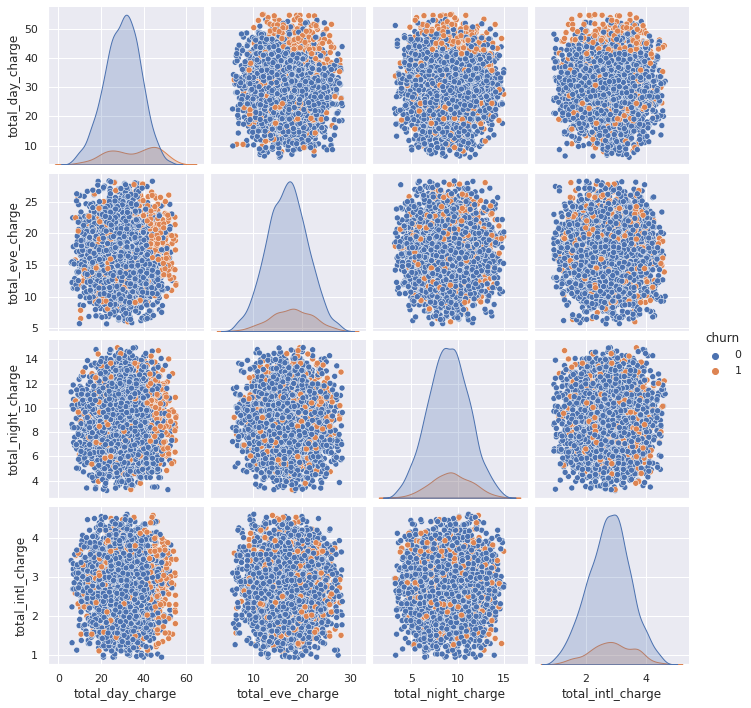

In [ ]:
sns.pairplot(df_new, vars=['total_day_charge','total_eve_charge',
                           'total_night_charge','total_intl_charge'], hue='churn');
plt.ioff

### Feature Selection

In [ ]:
# feature selection pada data frame yang akan digunakan prediksi
x = df_new.iloc[:, 0:-1]
y = df_new.iloc[:, -1]

In [ ]:
# melihat isi data dan berapa banyak kolom
x.shape

(4075, 6)

In [ ]:
# pertama bagi dataset menjadi train & test set setelah itu saya akan melakukan pemilihan fitur
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3260, 6) (815, 6) (3260,) (815,)


In [ ]:
# metode yang akan digunankan "Feature Importance"
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_)

[0.06285107 0.02698715 0.34357111 0.20993755 0.17570573 0.18094739]


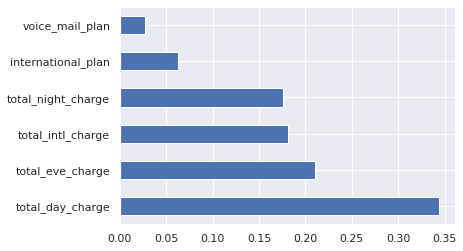

In [ ]:
# Melakukan visualisasi isi data 

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
# kolom set train
x_train.columns

Index(['international_plan', 'voice_mail_plan', 'total_day_charge',
       'total_eve_charge', 'total_night_charge', 'total_intl_charge'],
      dtype='object')

In [ ]:
# Memeriksa bentuk set dari pelatihan
x_train.shape

(3260, 6)

In [ ]:
# Before applying Machine Learning Let's scale the data
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Machine Learning Model Evaluations and Predictions

## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 10,metric= 'minkowski', p =2) 
knn_model.fit(x_train,y_train)#fitting model

#prediksi output
knn_pred = knn_model.predict(x_test)

In [ ]:
# Accuracy KNN
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.8969325153374234


In [ ]:
# precision
knn_pre = precision_score(y_test, knn_pred)
knn_pre

0.9722222222222222

In [ ]:
# recall
knn_rec = recall_score(y_test, knn_pred)
knn_rec

0.2966101694915254

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 13, criterion='entropy')
random_forest.fit(x_train, y_train) # fitting the model

# predicting 
random_pred = random_forest.predict(x_test)

In [ ]:
# Accuracy Random Forest
accuracy_rf = random_forest.score(x_test,y_test)
print("Random Forest accuracy:",accuracy_rf)

Random Forest accuracy: 0.9153374233128835


In [ ]:
# precision
random_pre = precision_score(y_test, random_pred)
random_pre

0.8356164383561644

In [ ]:
# recall
random_rec = recall_score(y_test, random_pred)
random_rec

0.5169491525423728

## DecisionTree

In [ ]:
d_tree = DecisionTreeClassifier(criterion='entropy') # creating instance
d_tree.fit(x_train, y_train) # fitting the training data

# predicting the 
d_tree_pred = d_tree.predict(x_test)

In [ ]:
# Accuracy Decision Tree
accuracy_dt = d_tree.score(x_test,y_test)
print("Decision Tree accuracy:",accuracy_dt)

Decision Tree accuracy: 0.8650306748466258


In [ ]:
# precision
d_tree_pre = precision_score(y_test, d_tree_pred)
d_tree_pre

0.53125

In [ ]:
# recall
d_tree_rec = recall_score(y_test, d_tree_pred)
d_tree_rec

0.576271186440678

## Performance at a Glance

In [ ]:
# creating performance dictionary
performance = {'Accuracy_Score':[accuracy_knn, accuracy_rf, accuracy_dt],
              'Precision':[knn_pre, random_pre, d_tree_pre],
              'Recall': [knn_rec, random_rec, d_tree_rec]}

In [ ]:
performance_df = pd.DataFrame(data = performance, index= ['KNeighbors','RandomForest','DecisionTree'])

In [ ]:
performance_df

,Accuracy_Score,Precision,Recall
KNeighbors,0.896933,0.972222,0.296610
RandomForest,0.915337,0.835616,0.516949
DecisionTree,0.865031,0.531250,0.576271


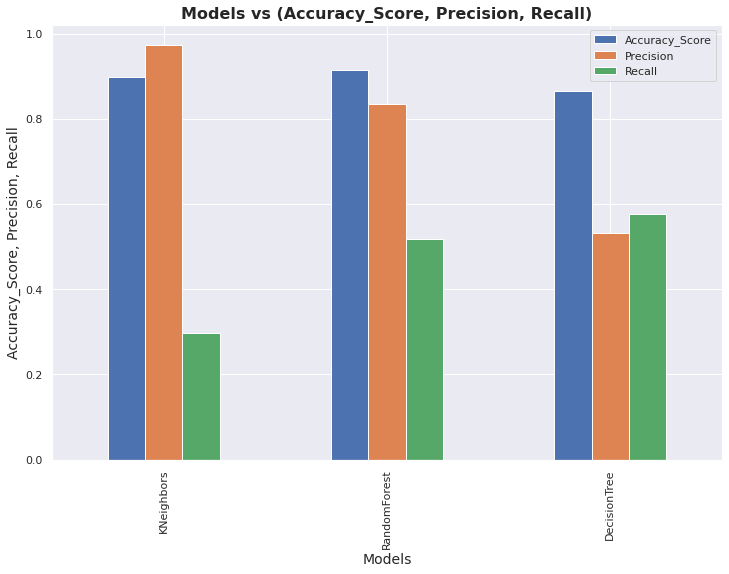

In [ ]:
# Model performance chart

performance_df.plot(kind="bar", figsize=(12,8))
plt.title('Models vs (Accuracy_Score, Precision, Recall)', fontdict= {'weight': 'bold',
        'size': 16})
plt.xlabel('Models', fontdict= {'size': 14})
plt.ylabel('Accuracy_Score, Precision, Recall',fontdict= {'size': 14})
plt.show()